## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix,classification_report

ps=PorterStemmer()
ls=WordNetLemmatizer()
cv=CountVectorizer()

## 2.Read Data

In [2]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Remove unnnecessarycolumns like: unnamed:2,unnamed:3 and unnamed:4
data=data.iloc[:,:2]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Check for null value in the columns
data.isnull().sum()

v1    0
v2    0
dtype: int64

### Rename column names as tags and message

In [5]:
# rename column names
data.rename(columns={'v1':'tag','v2':'message'},inplace=True)

In [6]:
data.head()

,tag,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['tag'].value_counts()

ham     4825
spam     747
Name: tag, dtype: int64

<AxesSubplot:>

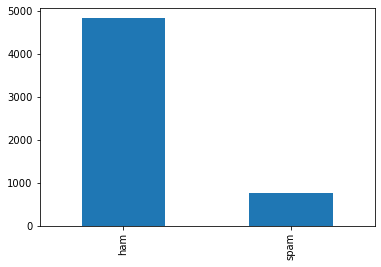

In [8]:
data['tag'].value_counts().plot(kind='bar')

### Preprocess the message column

In [9]:
message_new=[]  #Preprocessed data
for i in data['message']:
    i=re.sub('[^a-zA-Z0-9]',' ',i)
    message_new.append(' '.join(i.split()))
    

In [10]:
message_new

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry question std txt rate T C s apply 08452810075over18 s',
 'U dun say so early hor U c already then say',
 'Nah I don t think he goes to usf he lives around here though',
 'FreeMsg Hey there darling it s been 3 week s now and no word back I d like some fun you up for it still Tb ok XxX std chgs to send 1 50 to rcv',
 'Even my brother is not like to speak with me They treat me like aids patent',
 'As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertune for all Callers Press 9 to copy your friends Callertune',
 'WINNER As a valued network customer you have been selected to receivea 900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only',
 'Had your mobile 11 months or more U R entitled to 

In [11]:
data['messagenew']=message_new

In [12]:
data.head()

,tag,message,messagenew
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...


In [13]:
data=data[['tag','messagenew']]
data.head()

,tag,messagenew
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives arou...


## Now the data is cleaned 

## Spam detection

In [14]:
data.head()

,tag,messagenew
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives arou...


In [15]:
data['tag'].value_counts()

ham     4825
spam     747
Name: tag, dtype: int64

In [16]:
data['tag']=data['tag'].map({'ham':'0','spam':'1'})

In [17]:
data['tag'].value_counts()

0    4825
1     747
Name: tag, dtype: int64

## Insights:
    - Now we have modified the tags and spam is classified as 1 and ham messages are classified as 0

In [18]:
MessagePreProcessed=[]
for i in data['messagenew']:
    i=i.lower()
    word_tokenize=nltk.word_tokenize(i)
    stopwordremoval=[i for i in word_tokenize if i not in set(stopwords.words('english'))]
    
    #stemming
    stemming=[ps.stem(i) for i in stopwordremoval]
    
    MessagePreProcessed.append(' '.join(stemming))
    print(i)

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send 1 50 to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune
winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only
had your mobile 11 months or more u r entitled to update to the latest colour mobiles wi

you are a winner u have been specially selected 2 receive 1000 or a 4 holiday flights inc speak to a live operator 2 claim 0871277810910p min 18
goodo yes we must speak friday egg potato ratio for tortilla needed
hmm my uncle just informed me that he s paying the school directly so pls buy food
private your 2004 account statement for 07742676969 shows 786 unredeemed bonus points to claim call 08719180248 identifier code 45239 expires
urgent your mobile no was awarded 2000 bonus caller prize on 5 9 03 this is our final try to contact u call from landline 09064019788 box42wr29c 150ppm
here is my new address apples pairs all that malarky
todays voda numbers ending 7548 are selected to receive a 350 award if you have a match please call 08712300220 quoting claim code 4041 standard rates app
i am going to sao mu today will be done only at 12
predict wat time ll finish buying
good stuff will do
just so that you know yetunde hasn t sent money yet i just sent her a text not to bother sending s

or ill be a little closer like at the bus stop on the same street
where are you when wil you reach here
new theory argument wins d situation but loses the person so dont argue with ur friends just kick them amp say i m always correct
u 447801259231 have a secret admirer who is looking 2 make contact with u find out who they r reveal who thinks ur so special call on 09058094597
tomarrow final hearing on my laptop case so i cant
pleassssssseeeeee tel me v avent done sportsx
okay no no just shining on that was meant to be signing but that sounds better
although i told u dat i m into baig face watches now but i really like e watch u gave cos it s fr u thanx 4 everything dat u ve done today i m touched
u don t remember that old commercial
too late i said i have the website i didn t i have or dont have the slippers
i asked you to call him now ok
kallis wont bat in 2nd innings
it didnt work again oh ok goodnight then i ll fix and have it ready by the time you wake up you are very dearly misse

well i know z will take care of me so no worries
update now xmas offer latest motorola sonyericsson nokia free bluetooth double mins 1000 txt on orange call mobileupd8 on 08000839402 or call2optout f4q
here is your discount code rp176781 to stop further messages reply stop www regalportfolio co uk customer services 08717205546
wat uniform in where get
cool text me when you re ready
hello my boytoy geeee i miss you already and i just woke up i wish you were here in bed with me cuddling me i love you
i will spoil you in bed as well
i m going for bath will msg you next lt gt min
i cant keep talking to people if am not sure i can pay them if they agree to price so pls tell me what you want to really buy and how much you are willing to pay
thanks for your ringtone order reference t91 you will be charged gbp 4 per week you can unsubscribe at anytime by calling customer services on 09057039994
can you say what happen
you could have seen me i did t recognise you face
well there s not a lot of 

i think i ve fixed it can you send a test message
sorry man my account s dry or i would if you want we could trade back half or i could buy some shit with my credit card
congrats 1 year special cinema pass for 2 is yours call 09061209465 now c suprman v matrix3 starwars3 etc all 4 free bx420 ip4 5we 150pm dont miss out
sorry in meeting i ll call later
what class of lt gt reunion
are you free now can i call now
got meh when
nope think i will go for it on monday sorry i replied so late
some of them told accenture is not confirm is it true
kate jackson rec center before 7ish right
dear i have reache room
fighting with the world is easy u either win or lose bt fightng with some1 who is close to u is dificult if u lose u lose if u win u still lose
when can come out
check with nuerologist
lolnice i went from a fish to water
123 congratulations in this week s competition draw u have won the 1450 prize to claim just call 09050002311 b4280703 t cs stop sms 08718727868 over 18 only 150ppm
no it 

its a valentine game send dis msg to all ur friends if 5 answers r d same then someone really loves u ques which colour suits me the best rply me
i have many dependents
thanx4 today cer it was nice 2 catch up but we ave 2 find more time more often oh well take care c u soon c
i called and said all to him then he have to choose this future
happy valentines day i know its early but i have hundreds of handsomes and beauties to wish so i thought to finish off aunties and uncles 1st
he like not v shock leh cos telling shuhui is like telling leona also like dat almost all know liao he got ask me abt ur reaction lor
for my family happiness
i come n pick up come out immediately aft ur lesson
let there be snow let there be snow this kind of weather brings ppl together so friendships can grow
dear we got lt gt dollars hi hi
good words but words may leave u in dismay many times
make sure alex knows his birthday is over in fifteen minutes as far as you re concerned
sorry no have got few things to 

that is wondar full flim
ya even those cookies have jelly on them
the world is running and i am still maybe all are feeling the same so be it or i have to admit i am mad then where is the correction or let me call this is life and keep running with the world may be u r also running lets run
got it it looks scrumptious daddy wants to eat you all night long
of cos can lar i m not so ba dao ok 1 pm lor y u never ask where we go ah i said u would ask on fri but he said u will ask today
alright omw gotta change my order to a half8th
exactly anyways how far is jide her to study or just visiting
dunno y u ask me
email alertfrom jeri stewartsize 2kbsubject low cost prescripiton drvgsto listen to email call 123
no he didn t spring is coming early yay
lol you won t feel bad when i use her money to take you out to a steak dinner d
even u dont get in trouble while convincing just tel him once or twice and just tel neglect his msgs dont c and read it just dont reply
leaving to qatar tonite in searc

do you want 750 anytime any network mins 150 text and a new video phone for only five pounds per week call 08002888812 or reply for delivery tomorrow
sir i have been late in paying rent for the past few months and had to pay a lt gt charge i felt it would be inconsiderate of me to nag about something you give at great cost to yourself and that s why i didnt speak up i however am in a recession and wont be able to pay the charge this month hence my askin well ahead of month s end can you please help thanks
we tried to contact you re our offer of new video phone 750 anytime any network mins half price rental camcorder call 08000930705 or reply for delivery wed
last chance 2 claim ur 150 worth of discount vouchers text yes to 85023 now savamob member offers mobile t cs 08717898035 3 00 sub 16 remove txt x or stop
i luv u soo much u don t understand how special u r 2 me ring u 2morrow luv u xxx
pls send me a comprehensive mail about who i m paying when and how much
our prashanthettan s mot

i sent my scores to sophas and i had to do secondary application for a few schools i think if you are thinking of applying do a research on cost also contact joke ogunrinde her school is one me the less expensive ones
i cant wait to see you how were the photos were useful
ur cash balance is currently 500 pounds to maximize ur cash in now send go to 86688 only 150p msg cc 08718720201 po box 114 14 tcr w1
hey i booked the kb on sat already what other lessons are we going for ah keep your sat night free we need to meet and confirm our lodging
chk in ur belovd ms dict
is that what time you want me to come
awesome lemme know whenever you re around
shb b ok lor thanx
beautiful truth against gravity read carefully our heart feels light when someone is in it but it feels very heavy when someone leaves it good night
also remember to get dobby s bowl from your car
filthy stories and girls waiting for your
sorry i now then c ur msg yar lor so poor thing but only 4 one night tmr u ll have a brand 

dear u ve been invited to xchat this is our final attempt to contact u txt chat to 86688
lul im gettin some juicy gossip at the hospital two nurses are talking about how fat they are gettin and one thinks shes obese oyea
aight ill get on fb in a couple minutes
oi ami parchi na re kicchu kaaj korte iccha korche na phone ta tul na plz plz
where can download clear movies dvd copies
yep by the pretty sculpture
convey my regards to him
me too watching surya movie only after 6 pm vijay movie pokkiri
you tell what happen dont behave like this to me ok no need to say
can u get pic msgs to your phone
send to someone else
wat makes some people dearer is not just de happiness dat u feel when u meet them but de pain u feel when u miss dem
for me the love should start with attraction i should feel that i need her every time around me she should be the first thing which comes in my thoughts i would start the day and end it with her she should be there every time i dream love will be then when my eve

goodmorning today i am late for lt gt min
there s no point hangin on to mr not right if he s not makin u happy
all will come alive better correct any good looking figure there itself
in that case i guess i ll see you at campus lodge
we re done
come to my home for one last time i wont do anything trust me
i was up all night too worrying about this appt it s a shame we missed a girls night out with quizzes popcorn and you doing my hair
sex up ur mobile with a free sexy pic of jordan just text babe to 88600 then every wk get a sexy celeb pocketbabe co uk 4 more pics 16 3 wk 087016248
ok c ya
you have 1 new voicemail please call 08719181503
what he said is not the matter my mind saying some other matter is there
he also knows about lunch menu only da i know
al he does is moan at me if n e thin goes wrong its my fault al de arguments r my fault fed up of him of himso y bother hav 2go thanx xx
neft transaction with reference number lt gt for rs lt decimal gt has been credited to the benefici

how abt making some of the pics bigger
got but got 2 colours lor one colour is quite light n e other is darker lor actually i m done she s styling my hair now
whenevr ur sad whenevr ur gray remembr im here 2 listn 2 watevr u wanna say jus walk wid me a little while amp i promise i ll bring back ur smile
why nothing ok anyway give me treat
win the newest harry potter and the order of the phoenix book 5 reply harry answer 5 questions chance to be the first among readers
ok
correct so how was work today
just sent again do you scream and moan in bed princess
i wake up long ago already dunno what other thing
oh just getting even with u u
i thk 50 shd be ok he said plus minus 10 did leave a line in between paragraphs
can you call me plz your number shows out of coveragd area i have urgnt call in vasai amp have to reach before 4 o clock so call me plz
yeah jay s sort of a fucking retard
sorry was in the bathroom sup
ur balance is now 500 ur next question is who sang uptown girl in the 80 s 2 

thanks for ve lovely wisheds you rock
you intrepid duo you have a great time and see you both soon
i asked sen to come chennai and search for job
dad went out oredi
i jus hope its true that missin me cos i m really missin him you haven t done anything to feel guilty about yet
wat so late still early mah or we juz go 4 dinner lor aiya i dunno
arms fine how s cardiff and uni
in fact when do you leave i think addie goes back to school tues or wed
cool breeze bright sun fresh flower twittering birds all these waiting to wish u goodmorning amp have a nice day
ya going for restaurant
its ok i just askd did u knw tht no
free 1st week entry 2 textpod 4 a chance 2 win 40gb ipod or 250 cash every wk txt pod to 84128 ts cs www textpod net custcare 08712405020
those ducking chinchillas
i am in a marriage function
looks like u wil b getting a headstart im leaving here bout 2 30ish but if u r desperate for my company i could head in earlier we were goin to meet in rummer
don t give a flying monkeys 

me i dont know again oh
dude sux for snake he got old and raiden got buff
he says hi and to get your ass back to south tampa preferably at a kegger
in e msg jus now u said thanks for gift
u too
ok how you dear did you call chechi
yeah we do totes when u wanna
ok i found dis pierre cardin one which looks normal costs 20 its on sale
good sleep is about rhythm the person has to establish a rhythm that the body will learn and use if you want to know more
wat r u doing
message from i am at truro hospital on ext you can phone me here as i have a phone by my side
single line with a big meaning miss anything 4 ur best life but
just got some gas money any chance you and the gang want to go on a grand nature adventure
dnt worry use ice pieces in a cloth pack also take 2 tablets
dude just saw a parked car with its sunroof popped up sux
get ready to put on your excellent sub face
tmrw im finishing 9 doors
the lt gt g that i saw a few days ago the guy wants sell wifi only for lt gt and with 3g for 

hi if ur lookin 4 saucy daytime fun wiv busty married woman am free all next week chat now 2 sort time 09099726429 janinexx calls 1 minmobsmorelkpobox177hp51fl
s but mostly not like that
v ma fan
dunno cos i was v late n when i reach they inside already but we ate spageddies lor it s e gals who r laughing at me lor
guess who spent all last night phasing in and out of the fourth dimension
so now my dad is gonna call after he gets out of work and ask all these crazy questions
yes but they said its it
very hurting n meaningful lines ever i compromised everything for my love
lmao nice 1
glad to see your reply
urgent we are trying to contact u todays draw shows that you have won a 800 prize guaranteed call 09050001295 from land line claim a21 valid 12hrs only
monthly password for wap mobsi com is 391784 use your wap phone not pc
nah dub but je still buff
painful words i thought being happy was the most toughest thing on earth but
yeah that s fine it s 6 to get in is that ok
lol where do u c

u haven t lost me ill always b here 4u i didn t intend 2 hurt u but i never knew how u felt about me when iwas marine that s what itried2tell urmom i careabout u
win we have a winner mr t foley won an ipod more exciting prizes soon so keep an eye on ur mobile or visit www win 82050 co uk
you bad girl i can still remember them
how much i gave to you morning
i hope your alright babe i worry that you might have felt a bit desparate when you learned the job was a fake i am here waiting when you come back my love
hey can you tell me blake s address carlos wanted me to meet him there but i got lost and he s not answering his phone
can i get your opinion on something first
that one week leave i put know that time why
if we hit it off you can move in with me
excellent i spent lt gt years in the air force iraq and afghanistan i am stable and honest do you like traveling
i wanna watch that movie
ok lor thanx in school
i m in class did you get my text
the bus leaves at lt gt
god bless get good sl

its not that time of the month nor mid of the time
fffff can you text kadeem or are you too far gone
we not leaving yet ok lor then we go elsewhere n eat u thk
is fujitsu s series lifebook good
yar i wanted 2 scold u yest but late already i where got zhong se qing you if u ask me b4 he ask me then i ll go out w u all lor n u still can act so real
dont know you bring some food
no current and food here i am alone also
i ll be in sch fr 4 6 i dun haf da book in sch it s at home
hello they are going to the village pub at 8 so either come here or there accordingly ok
ok
we don call like lt gt times oh no give us hypertension oh
dont give a monkeys wot they think and i certainly don t mind any friend of mine all that just don t sleep wiv that wud be annoyin
omg it could snow here tonite
call from 08702490080 tells u 2 call 09066358152 to claim 5000 prize u have 2 enter all ur mobile personal details the prompts careful
free 1st week entry 2 textpod 4 a chance 2 win 40gb ipod or 250 cash ever

you always make things bigger than they are
dun wan to watch infernal affair
me not waking up until 4 in the afternoon sup
4mths half price orange line rental latest camera phones 4 free had your phone 11mths call mobilesdirect free on 08000938767 to update now or2stoptxt
i can send you a pic if you like
okay i booked all already including the one at bugis
aight fuck it i ll get it later
no de but call me after some time ill tell you k
so dont use hook up any how
how much is blackberry bold2 in nigeria
hi where you you in home or calicut
hey darlin i can pick u up at college if u tell me wen where 2 mt love pete xx
call 09094100151 to use ur mins calls cast 10p min mob vary service provided by aom just gbp5 month aom box61 m60 1er until u stop ages 18 only
oh i was thkin of goin yogasana at 10 den no nd to go at 3 den can rush to parco 4 nb okie lor u call me when ready
y so late but i need to go n get da laptop
sir i am waiting for your mail
please charge my mobile when you get up in 

i think you should go the honesty road call the bank tomorrow its the tough decisions that make us great people
free for 1st week no1 nokia tone 4 ur mob every week just txt nokia to 87077 get txting and tell ur mates zed pobox 36504 w45wq norm150p tone 16
no its not specialisation can work but its slave labor will look for it this month sha cos no shakara 4 beggar
is she replying has boye changed his phone number
1 go to write msg 2 put on dictionary mode 3 cover the screen with hand 4 press lt gt 5 gently remove ur hand its interesting
hi my darlin im on my way to london and we have just been smashed into by another driver and have a big dent im really missing u what have u been up to xxx
nothing really just making sure everybody s up to speed
i m not coming home 4 dinner
thank you and by the way i just lost
yes he have good crickiting mind
thx all will be well in a few months
shop till u drop is it you either 10k 5k 500 cash or 100 travel voucher call now 09064011000 ntt po box cr01

alex knows a guy who sells mids but he s down in south tampa and i don t think i could set it up before like 8
dont you have message offer
had your mobile 11mths update for free to oranges latest colour camera mobiles unlimited weekend calls call mobile upd8 on freefone 08000839402 or 2stoptx
hey there babe how u doin wot u up 2 2nite love annie x
remind me how to get there and i shall do so
that s not v romantic
hello damn this christmas thing i think i have decided to keep this mp3 that doesnt work
you have 1 new message please call 08718738034
hi darlin im missin u hope you are having a good time when are u back and what time if u can give me a call at home jess xx
forwarded from 21870000 hi this is your mailbox messaging sms alert you have 4 messages you have 21 matches please call back on 09056242159 to retrieve your messages and matches
draw va i dont think so
dont pick up d call when something important is there to tell hrishi
congrats 1 year special cinema pass for 2 is yours c

first has she gained more than lt gt kg since she took in second has she done the blood sugar tests if she has and its ok and her blood pressure is within normal limits then no worries
pick ur fone up now u dumb
thanks da thangam i feel very very happy dear i also miss you da
okey doke i m at home but not dressed cos laying around ill speak to you later bout times and stuff
i don t run away frm u i walk slowly amp it kills me that u don t care enough to stop me
babe i m back come back to me
well you told others you d marry them
neshanth tel me who r u
yo yo yo byatch whassup
oh kay on sat right
hi this is roger from cl how are you
babe u want me dont u baby im nasty and have a thing 4 filthyguys fancy a rude time with a sexy bitch how about we go slo n hard txt xxx slo 4msgs
oh oh wasted den muz chiong on sat n sun liao
jesus christ bitch i m trying to give you drugs answer your fucking phone
please give it 2 or i will pick it up on tuesday evening about 8 if that is ok
i m meeting dar

who u talking about
yup
ok
u wake up already wat u doing u picking us up later rite i m taking sq825 reaching ard 7 smth 8 like dat u can check e arrival time c ya soon
yunny i m walking in citylink now faster come down me very hungry
er yep sure props
hiya have u been paying money into my account if so thanks got a pleasant surprise when i checked my balance u c i don t get statements 4 that acc
u have won a nokia 6230 plus a free digital camera this is what u get when u win our free auction to take part send nokia to 83383 now pobox114 14tcr w1 16
ok ill send you with in lt decimal gt ok
bognor it is should be splendid at this time of year
yes i m in office da
sorry i ll call later
joy s father is john then john is the name of joy s father mandan
ok i only ask abt e movie u wan ktv oso
misplaced your number and was sending texts to your old number wondering why i ve not heard from you this year all the best in your mcat got this number from my atlanta friends
sorry i ll call later
du

urgent your mobile no 077xxx won a 2 000 bonus caller prize on 02 06 03 this is the 2nd attempt to reach you call 09066362206 asap box97n7qp 150ppm
i will cal you sir in meeting
that s what i love to hear v see you sundayish then
sorry da thangam very very sorry i am held up with prasad
tiwary to rcb battle between bang and kochi
thank god they are in bed
no i don t have cancer moms making a big deal out of a regular checkup aka pap smear
am in gobi arts college
why she wants to talk to me
pandy joined 4w technologies today he got job
you are guaranteed the latest nokia phone a 40gb ipod mp3 player or a 500 prize txt word collect to no 83355 ibhltd ldnw15h 150p mtmsgrcvd18
they can try they can get lost in fact tee hee
hi you just spoke to maneesha v we d like to know if you were satisfied with the experience reply toll free with yes or no
my friends use to call the same
sorry i ll call later
em its olowoyey usc edu have a great time in argentina not sad about secretary everything is a

and picking them up from various points
married local women looking for discreet action now 5 real matches instantly to your phone text match to 69969 msg cost 150p 2 stop txt stop bcmsfwc1n3xx
wow v v impressed have funs shopping
i am on the way to ur home
burger king wanna play footy at a top stadium get 2 burger king before 1st sept and go large or super with coca cola and walk out a winner
no problem talk to you later
then ur sis how
still in customer place
how come it takes so little time for a child who is afraid of the dark to become a teenager who wants to stay out all night
dude u knw also telugu thts gud k gud nyt
we confirm eating at esplanade
send me your id and password
kind of took it to garage centre part of exhaust needs replacing part ordered n taking it to be fixed tomo morning
for ur chance to win a 250 cash every wk txt action to 80608 t s c s www movietrivia tv custcare 08712405022 1x150p wk
well i might not come then
long after i quit i get on only like 5 minutes 

shuhui has bought ron s present it s a swatch watch
yeah there s quite a bit left i ll swing by tomorrow when i get up
babe you said 2 hours and it s been almost 4 is your internet down
k i ll be sure to get up before noon and see what s what
k k yesterday i was in cbe
went to ganesh dress shop
pdate now double mins and 1000 txts on orange tariffs latest motorola sonyericsson nokia bluetooth free call mobileupd8 on 08000839402 or call2optout yhl
collecting ur laptop then going to configure da settings izzit
if you r home then come down within 5 min
aight i should be there by 8 at the latest probably closer to 7 are jay and tyler down or should we just do two trips
come aftr lt decimal gt now i m cleaning the house
ur cash balance is currently 500 pounds to maximize ur cash in now send cash to 86688 only 150p msg cc 08718720201 po box 114 14 tcr w1
bill as in are there any letters for me i m expecting one from orange that isn t a bill but may still say orange on it
tell me pa how is pai

lt gt is fast approaching so wish u a very happy new year happy sankranti happy republic day happy valentines day happy shivratri happy ugadi happy fools day happy may day happy independence day happy friendship mother father teachers childrens day amp happy birthday 4 u happy ganesh festival happy dasara happy diwali happy christmas lt gt good mornings afternoons evenings nights rememberi am the first to wishing u all these your s raj
one of the joys in lifeis waking up each daywith thoughts that somewheresomeone cares enough tosend a warm morning greeting
i didn t get the second half of that message
wat time do u wan 2 meet me later
i thank you so much for all you do with selflessness i love you plenty
am in film ill call you later
how dare you change my ring
you are a very very very very bad girl or lady
i love ya too but try and budget your money better babe gary would freak on me if he knew
what part of don t initiate don t you understand
i finished my lunch already u wake up alre

cheers u tex mecause u werebored yeah okden hunny r uin wk sat sound s likeyour havin gr8fun j keep updat countinlots of loveme xxxxx
sorry in meeting i ll call you later
yo howz u girls never rang after india l
yeah but which is worse for i
hard live 121 chat just 60p min choose your girl and connect live call 09094646899 now cheap chat uk s biggest live service vu bcm1896wc1n3xx
i tagged my friends that you seemed to count as your friends
not heard from u4 a while call 4 rude chat private line 01223585334 to cum wan 2c pics of me gettin shagged then text pix to 8552 2end send stop 8552 sam xxx
ok
long time you remember me today
havent shopping now lor i juz arrive only
thank u it better work out cause i will feel used otherwise
are you up for the challenge i know i am
how much did ur hdd casing cost
mystery solved just opened my email and he s sent me another batch isn t he a sweetie
i can t describe how lucky you are that i m actually awake by noon
this is the 2nd time we have tried

you have 1 new voicemail please call 08719181513
moon has come to color your dreams stars to make them musical and my sms to give you warm and peaceful sleep good night
just finished eating got u a plate not leftovers this time
thanx a lot
hurry home u big butt hang up on your last caller if u have to food is done and i m starving don t ask what i cooked
lol your right what diet everyday i cheat anyway i m meant to be a fatty
its a great day do have yourself a beautiful one
what happened in interview
solve d case a man was found murdered on lt decimal gt lt gt afternoon 1 his wife called police 2 police questioned everyone 3 wife sir i was sleeping when the murder took place 4 cook i was cooking 5 gardener i was picking vegetables 6 house maid i went 2 d post office 7 children we went 2 play 8 neighbour we went 2 a marriage police arrested d murderer immediately who s it reply with reason if u r brilliant
badrith is only for chennai i will surely pick for us no competition for him
i to

good night my dear sleepwell amp take care
then ask dad to pick up lar wan 2 stay until 6 meh
jus chillaxin what up
hey das cool iknow all 2 wellda peril of studentfinancial crisis spk 2 u l8r
beautiful truth against gravity read carefully our heart feels light when someone is in it but it feels very heavy when someone leaves it goodmorning
do you want a new nokia 3510i colour phone deliveredtomorrow with 300 free minutes to any mobile 100 free texts free camcorder reply or call 08000930705
whats that coming over the hill is it a monster hope you have a great day things r going fine here busy though
joy s father is john then john is the of joy s father if u ans ths you hav lt gt iq tis s ias question try to answer
only once then after ill obey all yours
no she didnt i will search online and let you know
where do you need to go to get it
no pic please re send
he remains a bro amongst bros
uhhhhrmm isnt having tb test bad when youre sick
but i haf enuff space got like 4 mb
life has never

i will come to ur home now
free any day but i finish at 6 on mon n thurs
will you be here for food
life alle mone eppolum oru pole allalo
nite
two fundamentals of cool life walk
camera quite good 10 1mega pixels 3optical and 5digital dooms have a lovely holiday be safe and i hope you hav a good journey happy new year to you both see you in a couple of weeks
hi petey noi m ok just wanted 2 chat coz avent spoken 2 u 4 a long time hope ur doin alrite have good nit at js love ya am x
i just saw ron burgundy captaining a party boat so yeah
i m serious you are in the money base
already one guy loving you
staff of placement training in amrita college
i always chat with you in fact i need money can you raise me
i m job profile seems like bpo
well i was about to give up cos they all said no they didn t do one nighters i persevered and found one but it is very cheap so i apologise in advance it is just somewhere to sleep isnt it
so you think i should actually talk to him not call his boss in the

no message no responce what happend
i want to tel u one thing u should not mistake me k this is the message that you sent
yeah right i ll bring my tape measure fri
still chance there if you search hard you will get it let have a try
meeting u is my work tel me when shall i do my work tomorrow
should i head straight there or what
get the official england poly ringtone or colour flag on yer mobile for tonights game text tone or flag to 84199 optout txt eng stop box39822 w111wx 1 50
thank you princess you are so sexy
oooh i got plenty of those
hui xin is in da lib
its a big difference lt gt versus lt gt every lt gt hrs
it s not that you make me cry it s just that when all our stuff happens on top of everything else it pushes me over the edge you don t underdtand how often i cry over my sorry sorry life
me 2 babe i feel the same lets just 4get about it both try cheer up not fit soo muchxxlove u locaxx
you know what hook up means right
customer service announcement we recently tried to make

im on gloucesterroad what are uup to later
yes here tv is always available in work place
yes the only place in town to meet exciting adult singles is now in the uk txt chat to 86688 now 150p msg
lol no ouch but wish i d stayed out a bit longer
god asked what is forgiveness a little child gave lovely reply
we ll join the lt gt bus
was just about to ask will keep this one maybe that s why you didn t get all the messages we sent you on glo
free for 1st week no1 nokia tone 4 ur mob every week just txt nokia to 8007 get txting and tell ur mates www getzed co uk pobox 36504 w45wq norm150p tone 16
k i will send in lt gt min
would me smoking you out help us work through this difficult time
someone u know has asked our dating service 2 contact you cant guess who call 09058095107 now all will be revealed pobox 7 s3xy 150p
yes mum lookin strong
sir goodmorning once free call me
where are you call me
was gr8 to see that message so when r u leaving congrats dear what school and wat r ur plans
love 

she left it very vague she just said she would inform the person in accounting about the delayed rent and that i should discuss with the housing agency about my renting another place but checking online now and all places around usc are lt gt and up
hi juan im coming home on fri hey of course i expect a welcome party and lots of presents ill phone u when i get back loads of love nicky x x x x x x x x x
can you plz tell me the ans bslvyl sent via fullonsms com
short but cute be a good person
gumby s has a special where a lt gt cheese pizza is 2 so i know what we re doin tonight
a link to your picture has been sent you can also use http alto18 co uk wave wave asp o 44345
like a personal sized or what
same i m at my great aunts anniversary party in tarpon springs
cab is available they pick up and drop at door steps
ok take care umma to you too
unlimited texts limited minutes
double mins 1000 txts on orange tariffs latest motorola sonyericsson nokia with bluetooth free call mobileupd8 on 0

i m reaching home in 5 min
forgot you were working today wanna chat but things are ok so drop me a text when you re free bored etc and i ll ring hope all is well nose essay and all xx
ha then we must walk to everywhere cannot take tram my cousin said can walk to vic market from our hotel
wan2 win a meet greet with westlife 4 u or a m8 they are currently on what tour 1 unbreakable 2 untamed 3 unkempt text 1 2 or 3 to 83049 cost 50p std text
please call our customer service representative on freephone 0808 145 4742 between 9am 11pm as you have won a guaranteed 1000 cash or 5000 prize
discussed with your mother ah
ok
sorry i can t text amp drive coherently see you in twenty
you will be receiving this week s triple echo ringtone shortly enjoy it
in which place i can get rooms cheap
eek that s a lot of time especially since american pie is like 8 minutes long i can t stop singing it
gran onlyfound out afew days ago cusoon honi
u ve been selected to stay in 1 of 250 top british hotels for no

hi baby ive just got back from work and i was wanting to see u allday i hope i didnt piss u off on the phone today if u are up give me a call xxx
freemsg today s the day if you are ready i m horny live in your town i love sex fun games netcollex ltd 08700621170150p per msg reply stop to end
is it your yahoo boys that bring in the perf or legal
no need to say anything to me i know i am an outsider
have you ever had one foot before
just got to lt gt
good no don t need any receipts well done yes please tell what s her number i could ring her
ever green quote ever told by jerry in cartoon a person who irritates u always is the one who loves u vry much but fails to express it gud nyt
leave it wif me lar wan to carry meh so heavy is da num 98321561 familiar to
beautiful truth expression of the face could be seen by everyone but the depression of heart could be understood only by the loved ones gud ni8
infact happy new year how are you where are you when are we seeing
in the simpsons movie re

important information 4 orange user today is your lucky day 2find out why log onto http www urawinner com there s a fantastic surprise awaiting you
i am late i will be there at
sad story of a man last week was my b day my wife did nt wish me my parents forgot n so did my kids i went to work even my colleagues did not wish
are you plans with your family set in stone
pls dont forget to study
you ll never believe this but i have actually got off at taunton wow
den only weekdays got special price haiz cant eat liao cut nails oso muz wait until i finish drivin wat lunch still muz eat wat
she just broke down a list of reasons why nobody s in town and i can t tell if she s being sarcastic or just faggy
lt decimal gt m but its not a common car here so its better to buy from china or asia or if i find it less expensive i ll holla
the greatest test of courage on earth is to bear defeat without losing heart gn tc
sorry im stil fucked after last nite went tobed at 430 got up 4 work at 630
hey so w

me fine absolutly fine
k and you re sure i don t have to have consent forms to do it v
ur tonexs subscription has been renewed and you have been charged 4 50 you can choose 10 more polys this month www clubzed co uk billing msg
if you don t your prize will go to another customer t c at www t c biz 18 150p min polo ltd suite 373 london w1j 6hl please call back if busy
how much is torch in 9ja
doing nothing then u not having dinner w us
how are you just checking up on you
done it but internet connection v slow and can t send it will try again later or first thing tomo
mathews or tait or edwards or anderson
yeah sure thing mate haunt got all my stuff sorted but im going sound anyway promoting hex for by the way who is this dont know number joke
no need lar i go engin cos my sis at arts today
thanks honey but still haven t heard anything i will leave it a bit longer so not 2 crowd him and will try later great advice thanks hope cardiff is still there
do you want a new nokia 3510i colour ph

probably a couple hours tops
lol grins i m not babe but thanks for thinking of me
man this bus is so so so slow i think you re gonna get there before me
hope this text meets you smiling if not then let this text give you a reason to smile have a beautiful day
in case you wake up wondering where i am i forgot i have to take care of something for grandma today should be done before the parade
ok
latest nokia mobile or ipod mp3 player 400 proze guaranteed reply with win to 83355 now norcorp ltd 1 50 mtmsgrcvd18
sms services for your inclusive text credits pls goto www comuk net login 3qxj9 unsubscribe with stop no extra charge help 08702840625 comuk 220 cm2 9ae
nvm take ur time
so wat s da decision
wot is u up 2 then bitch
stupid its not possible
she told to hr that he want posting in chennai because i m working here
mobile club choose any of the top quality items for your mobile 7cfca1a
when are you guys leaving
he neva grumble but i sad lor hee buy tmr lor aft lunch but we still meetin 

full heat pa i have applyed oil pa
i m stuck in da middle of da row on da right hand side of da lt
have you laid your airtel line to rest
hi did u decide wot 2 get 4 his bday if not ill prob jus get him a voucher frm virgin or sumfing
freemsg txt call to no 86888 claim your reward of 3 hours talk time to use from your phone now subscribe6gbp mnth inc 3hrs 16 stop txtstop
hey j r u feeling any better
and i don t plan on staying the night but i prolly won t be back til late
thanx 4 puttin da fone down on me
i need an 8th but i m off campus atm could i pick up in an hour or two
oh haha den we shld had went today too gee nvm la kaiez i dun mind goin jazz oso scared hiphop open cant catch up
been running but only managed 5 minutes and then needed oxygen might have to resort to the roller option
we live in the next lt gt mins
y de asking like this
just glad to be talking to you
wat time finish
sorry da i gone mad so many pending works what to do
how much you got for cleaning
hows my favourit

nt only for driving even for many reasons she is called bbd thts it chikku then hw abt dvg cold heard tht vinobanagar violence hw is the condition and hw ru any problem
i bought the test yesterday its something that lets you know the exact day u ovulate when will get 2u in about 2 to 3wks but pls pls dont fret i know u r worried pls relax also is there anything in ur past history u need to tell me
we have pizza if u want
i keep seeing weird shit and bein all woah then realising it s actually reasonable and i m all oh
many more happy returns of the day i wish you happy birthday
ya very nice be ready on thursday
i am in hospital da i will return home in evening
thinking of u x
camera you are awarded a sipix digital camera call 09061221066 fromm landline delivery within 28 days
orh i tot u say she now still dun believe
when you just put in the sign choose my number and the pin will show right
the beauty of life is in next second which hides thousands of secrets i wish every second will be

also north carolina and texas atm you would just go to the gre site and pay for the test results to be sent
same to u
yes baby i need to stretch open your pussy
thanks and or bomb and date as my phone wanted to say
ok
hey a guy i know is breathing down my neck to get him some bud anyway you d be able to get a half track to usf tonight
response is one of d powerful weapon 2 occupy a place in others heart so
nokia phone is lovly
free message thanks for using the auction subscription service 18 150p msgrcvd 2 skip an auction txt out 2 unsubscribe txt stop customercare 08718726270
bored housewives chat n date now 0871750 77 11 bt national rate 10p min only from landlines
sorry da today i wont come to play i have driving clas
i m really sorry i lit your hair on fire
oh shit i thought that was your trip loooooool that just makes so much more sense now grins and the sofa reference was the sleep on a couch link you sent me wasn t that how you went on your trip oh and didn t your babe go with y

urgent we are trying to contact u todays draw shows that you have won a 2000 prize guaranteed call 09058094507 from land line claim 3030 valid 12hrs only
you can donate 2 50 to unicef s asian tsunami disaster support fund by texting donate to 864233 2 50 will be added to your next bill
future is not what we planned for tomorrow it is the result of what we do today do the best in present enjoy the future
i will cme i want to go to hos 2morow after that i wil cme this what i got from her dear what to do she didnt say any time
we are supposed to meet to discuss abt our trip thought xuhui told you in the afternoon thought we can go for lesson after that
hey come online use msn we are all there
i m fine hope you are good do take care
oops i was in the shower when u called hey a parking garage collapsed at university hospital see i m not crazy stuff like that does happen
aiyo u so poor thing then u dun wan 2 eat u bathe already
yar i tot u knew dis would happen long ago already
you are gorge

gokila is talking with you aha
hi shanil rakhesh here thanks i have exchanged the uncut diamond stuff leaving back excellent service by dino and prem
k k this month kotees birthday know
but i m really really broke oh no amount is too small even lt gt
sorry about that this is my mates phone and i didnt write it love kate
themob hit the link to get a premium pink panther game the new no 1 from sugababes a crazy zebra animation or a badass hoody wallpaper all 4 free
ah well that confuses things doesnt it i thought was friends with now maybe i did the wrong thing but i already sort of invited tho he may not come cos of money
aight call me once you re close
nope thats fine i might have a nap tho
this msg is for your mobile content order it has been resent as previous attempt failed due to network error queries to customersqueries netvision uk com
in other news after hassling me to get him weed for a week andres has no money haughaighgtujhyguj
a boy loved a gal he propsd bt she didnt mind he

i know you are thinkin malaria but relax children cant handle malaria she would have been worse and its gastroenteritis if she takes enough to replace her loss her temp will reduce and if you give her malaria meds now she will just vomit its a self limiting illness she has which means in a few days it will completely stop
dai i downloaded but there is only exe file which i can only run that exe after installing
it is only yesterday true true
k k how is your business now
3 pa but not selected
natalja 25 f is inviting you to be her friend reply yes 440 or no 440 see her www sms ac u nat27081980 stop send stop frnd to 62468
i keep ten rs in my shelf buy two egg
i am late i will be there at
well thats nice too bad i cant eat it
i accidentally brought em home in the box
pls she needs to dat slowly or she will vomit more
i have to take exam with in march 3
jane babes not goin 2 wrk feel ill after lst nite foned in already cover 4 me chuck
5 nights we nt staying at port step liao too ex
if i 

no sir that s why i had an 8 hr trip on the bus last week have another audition next wednesday but i think i might drive this time
do i i thought i put it back in the box
i m home
no one interested may be some business plan
yup it s at paragon i havent decided whether 2 cut yet hee
good morning princess have a great day
guai shd haf seen him when he s naughty so free today can go jogging
aiyo cos i sms then neva reply so i wait 4 to reply lar i tot havent finish ur lab wat
living is very simple loving is also simple laughing is too simple winning is tooo simple but being simple is very difficult
tell me something thats okay
ok
hmm shall i bring a bottle of wine to keep us amused just joking i ll still bring a bottle red or white see you tomorrow
this is ur face test 1 2 3 4 5 6 7 8 9 lt gt select any number i will tell ur face astrology am waiting quick reply
hey iouri gave me your number i m wylie ryan s friend
yep get with the program you re slacking
i m in inside office still fillin

also fuck you and your family for going to rhode island or wherever the fuck and leaving me all alone the week i have a new bong gt
ofcourse i also upload some songs
2p per min to call germany 08448350055 from your bt line just 2p per min check planettalkinstant com for info t s c s text stop to opt out
k i will sent it again
oh thanks a lot i already bought 2 eggs
k i will sent it again
u studying in sch or going home anyway i ll b going 2 sch later
marvel mobile play the official ultimate spider man game 4 50 on ur mobile right now text spider to 83338 for the game we ll send u a free 8ball wallpaper
i think if he rule tamilnadu then its very tough for our people
cool we shall go and see have to go to tip anyway are you at home got something to drop in later so lets go to town tonight maybe mum can take us in
good afternoon my love how goes your day how did you sleep i hope your well my boytoy i think of you
yes i trust u to buy new stuff asap so i can try it out
sms services for you

In [19]:
data.head()

,tag,messagenew
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


In [20]:
data['MessagePreProcessed']=MessagePreProcessed

In [21]:
data.head()

,tag,messagenew,MessagePreProcessed
0,0,Go until jurong point crazy Available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar Joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor U c already then say,u dun say earli hor u c alreadi say
4,0,Nah I don t think he goes to usf he lives arou...,nah think goe usf live around though


In [22]:
x=cv.fit_transform(data['MessagePreProcessed']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y=data['tag']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: tag, Length: 5572, dtype: object

## Train-Test-Split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457, 7159)
(4457,)
(1115, 7159)
(1115,)


In [26]:
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [27]:
y_pred=classifier.predict(x_test)
y_pred

array(['0', '0', '1', ..., '0', '0', '1'], dtype='<U1')

In [28]:
print(accuracy_score(y_test, y_pred))

0.9775784753363229


In [29]:
print(confusion_matrix(y_test,y_pred))

[[952  13]
 [ 12 138]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Insights:
    - We have got 98 percent accuracy.

## Predict the newly given message

In [31]:
# Reusable method for predicting the newly added message
def predict_spam(message):
    message=re.sub('[^a-zA-Z0-9]',' ',string=message)   #sub takes three parameters(replace by,replace with,string)
    message=message.lower()
    
    message=message.split()
    
    stopwordremoval=[ps.stem(i) for i in message if i not in set(stopwords.words('english'))]
    finalmessage=' '.join(stopwordremoval)
    
    finalmessage=cv.transform([finalmessage]).toarray()
    
    predicted=classifier.predict(finalmessage) 
    if(predicted=='1'):
        return "Spam"
    else:
        return "Not spam/Ham"

### Prediction

In [32]:
#store a message in newmessage variable and pass it to the above function which preedicts message as ham/spam
newmessage='be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out'
newmessage

'be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out'

In [33]:
predict_spam(newmessage)

'Spam'

### Above message was correctly calssified as `spam` and it looks suspicious

In [34]:
newmessage2="we will meet this sunday for dinner at taj hotel"
newmessage2

'we will meet this sunday for dinner at taj hotel'

In [35]:
predict_spam(newmessage2)

'Not spam/Ham'

### Above message was correctly calssified as `Not spam/ Ham` and sentence looks casual. 